<a href="https://colab.research.google.com/github/hdn0101/heartprediction/blob/main/Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Files:

Master: https://drive.google.com/drive/folders/1iz4J2R2X27k_7aActzdFN1qc8gkSHfxU

Working Space:
https://docs.google.com/spreadsheets/d/1cqGlJuKMFPlU-Za8kDc9WMarEJwvsdyrxwInNpXMd8U/edit#gid=0

Data File Link:
https://www.kaggle.com/datasets/arezaei81/heartcsv

We put the data file in our Drive also:
https://docs.google.com/spreadsheets/d/1ORvo_TyKHUl_z-c3w3yYZvHk-bVefCgw9HrcSgwsZ24/edit?usp=drive_link

Presentation:
https://www.canva.com/design/DAF5g5Iemh8/Q6jO1v9VF0zYQHSbmWM9HA/edit?utm_content=DAF5g5Iemh8&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton



**Requirements:**

This project involves acquiring a data set you find interesting, describing it, and formulating
and solving a prediction problem. In other words, you will complete a supervised
learning project where the goal is to create a model that makes as accurate predictions
in your domain as possible. The steps involved in this process are:
1. Obtain data you find interesting (see below for potential sources)
2. Clean and format the data
3. Iterate between the next steps until you are satisfied
(a) Train and tune several types of models
(b) Investigate the predictions of your models and add features as needed
4. Do a final round of tuning and training
5. Select and evaluate your final model
You should expect to spend ∼40% of your time on cleaning the data, ∼40% on iteratively
improving your model and roughly 15% on parameter tuning.

**Syllabus:**

Group project: You will work in teams to come up with a project that involves acquiring a dataset, describing the dataset, and formulating and solving a prediction problem. There are three key milestones:
1. Topic selection and descriptive analysis: We will not have formal project proposals.By the start of the lab sessions on (11 January) your team should know what dataset you are working on, have completed basic analyses and be ready to discussthis with the instructors. Sticking with this timeline is crucial to ensure that youcan receive feedback in time for it to matter.
2. Final presentation (16 January): Present your project to the instructor and your classmates. You are not expected to show code during the presentation but you should be able to answer questions about your data and methods.
3. At completion of course: Submit your dataset, Jupyter/Colab notebooks and pre-sentations.

Detailed information about the course project and suggested data sources can be foundin a separate document on the course page.

Dataset Information/features:

1.   y Variable = Heart Disease? (1 Yes, 0 No)


*  age: The age of the patient.
*  sex: Gender of the patient (0: female, 1: male).
*  cp: Type of chest pain.
*  trestbps: Resting blood pressure.
*  chol: Serum cholesterol.
*  fbs: Fasting blood sugar > 120 mg/dl.
*  restecg: Resting electrocardiographic results.
*  thalach: Maximum heart rate achieved.
*  exang: Exercise induced angina. - pain in the chest caused by exercise
*  oldpeak: ST depression induced by exercise relative to rest - reduced oxygen due to exercise

# **Heart Disease Project:**

# I. Data Exploration

In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rcParams['figure.dpi']= 75  # set the resolution of displayed figures
mpl.rc("savefig", dpi=150) # set the resolution of saved figures
plt.style.use('seaborn')

<ipython-input-5-857bafb8d5de>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [6]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# check null values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


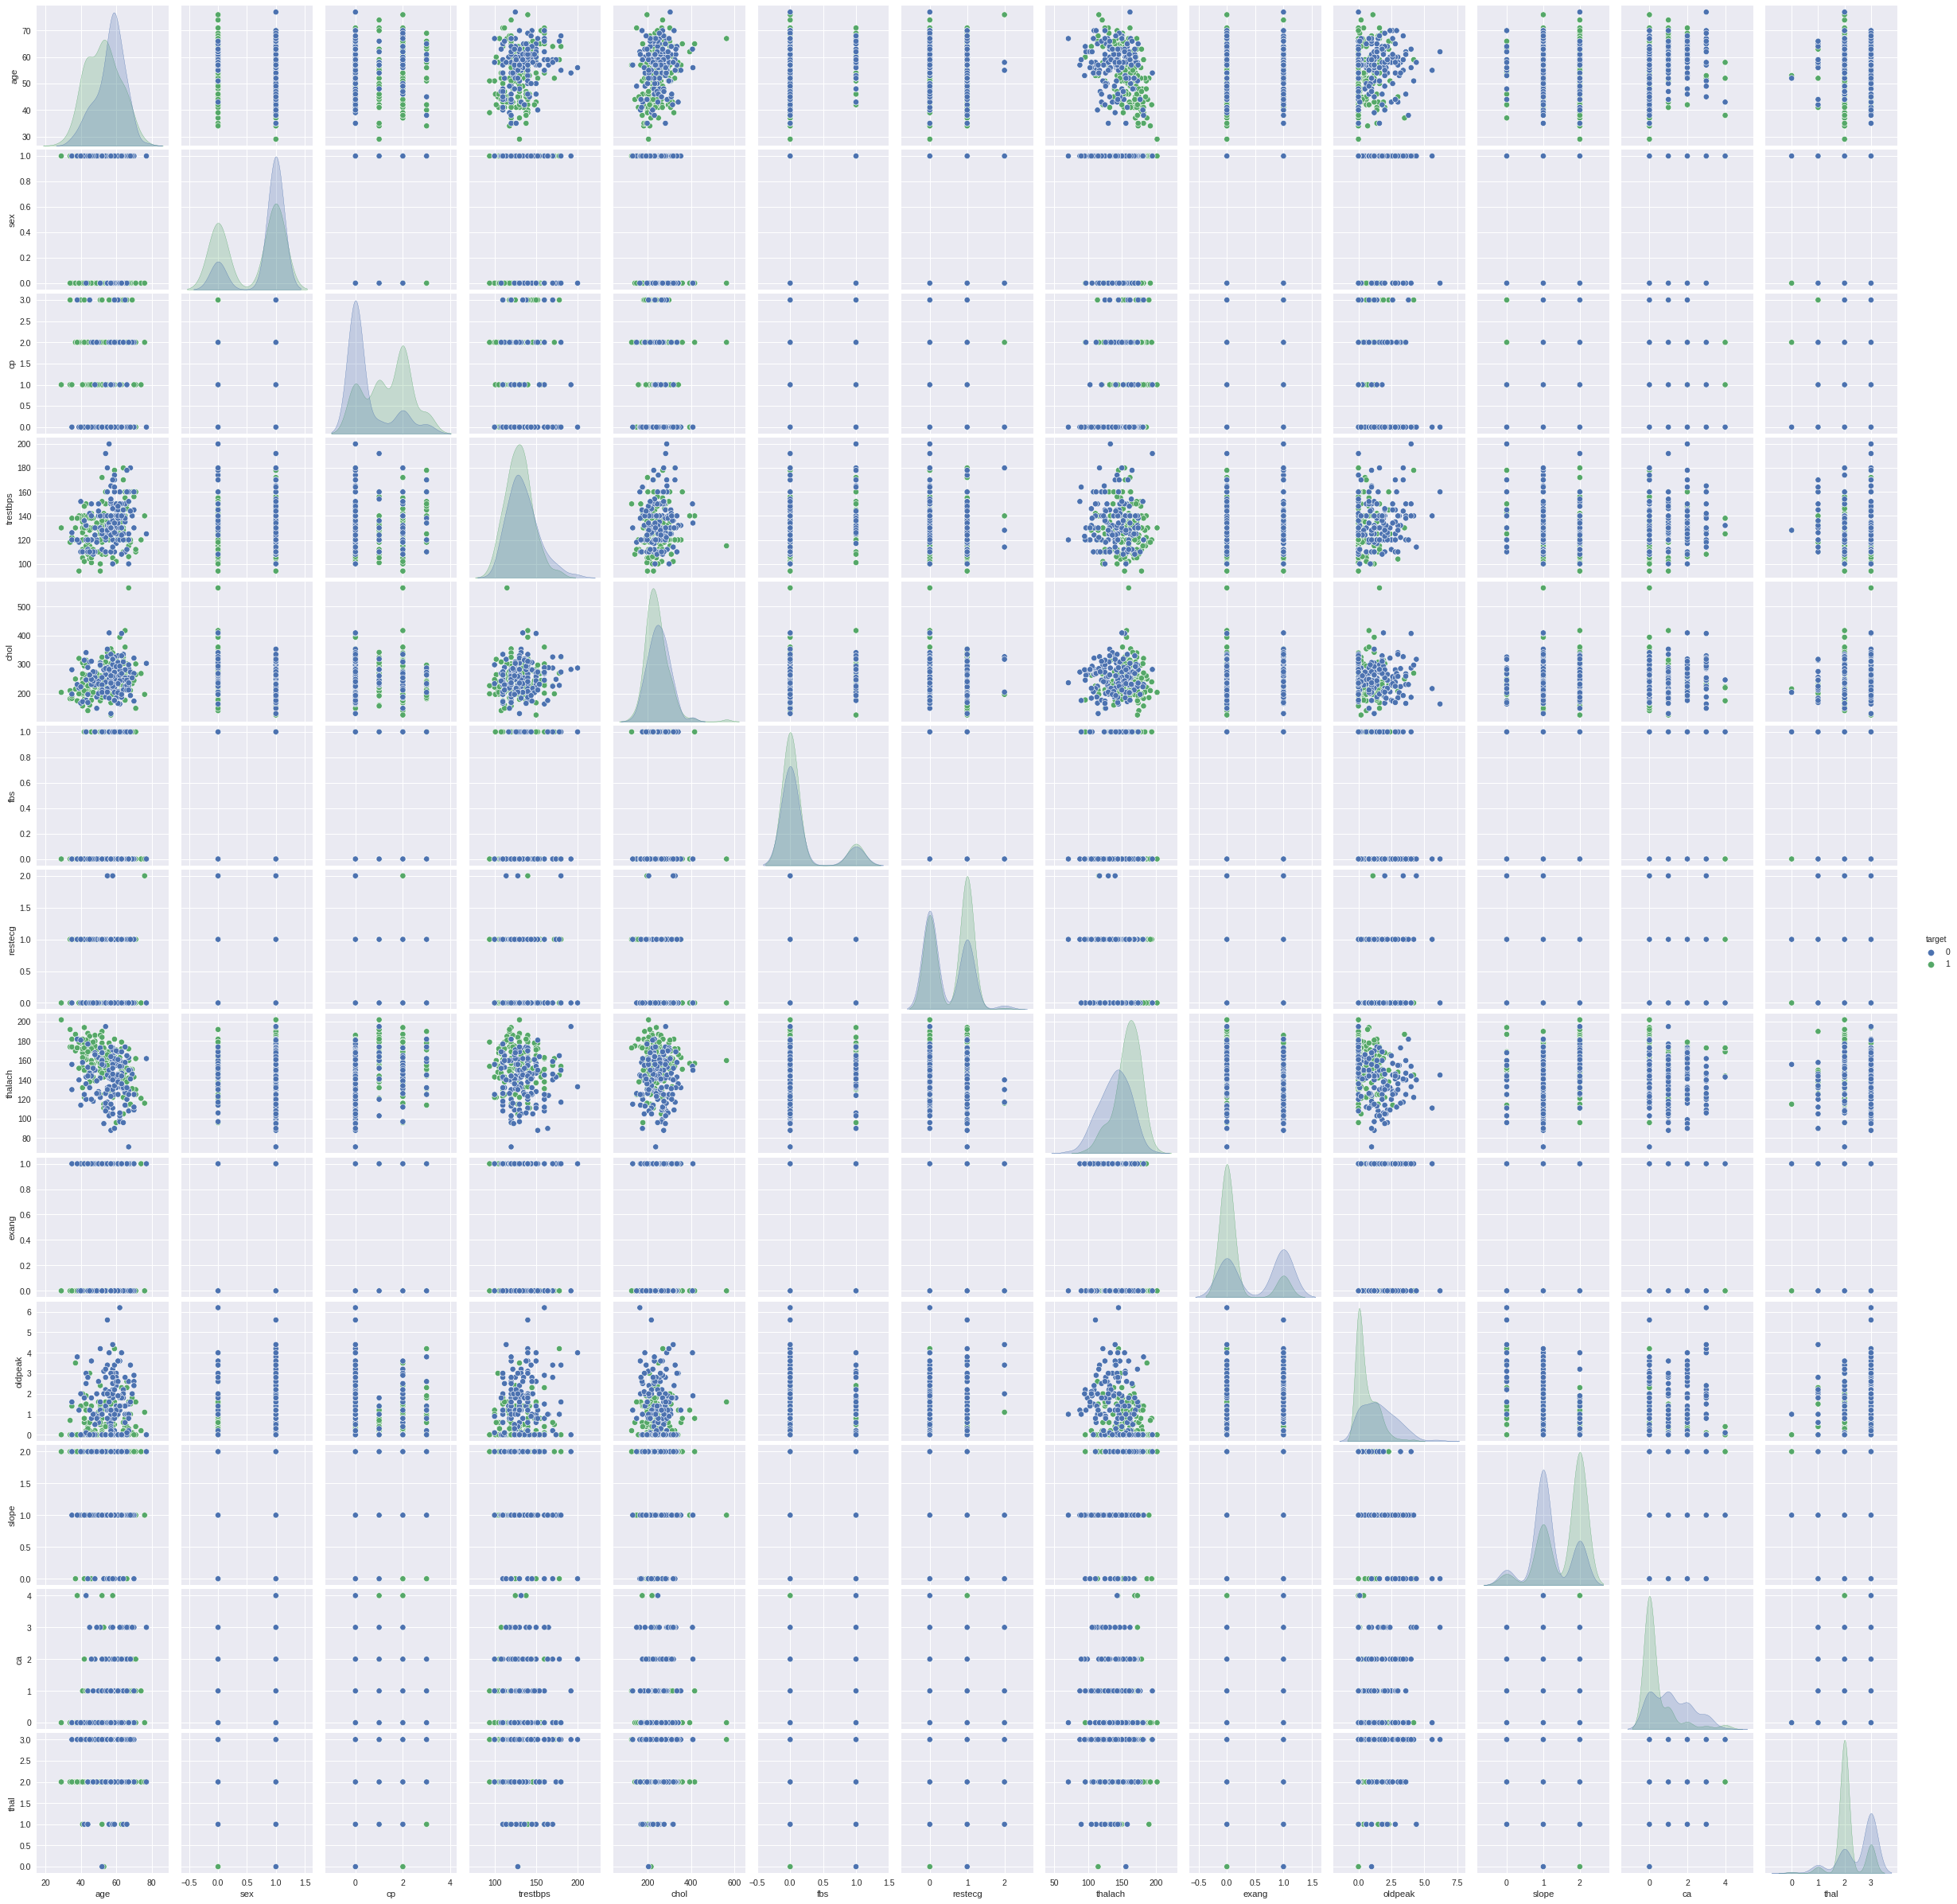

In [ ]:
# correlation
sns.pairplot(df,hue='target')
plt.show()

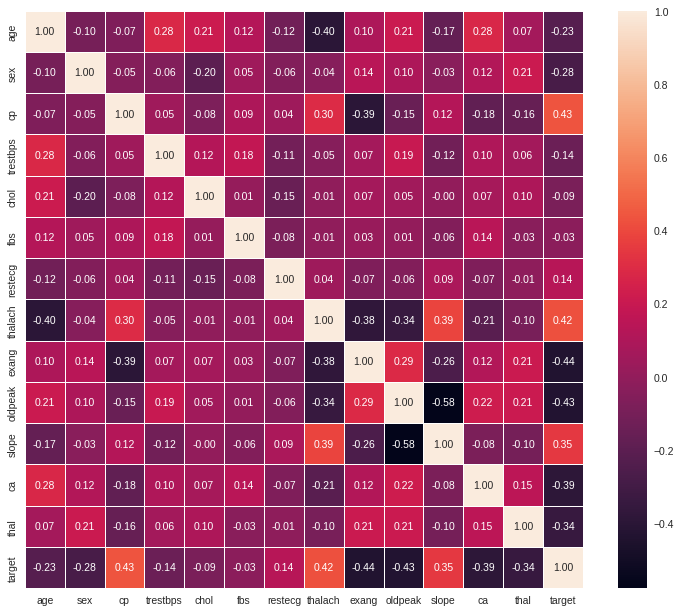

In [ ]:
# Multicollinearity heatmap
correlation = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(correlation, annot=True, fmt=".2f", linewidths=.5, annot_kws={"size": 10})

plt.show()

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

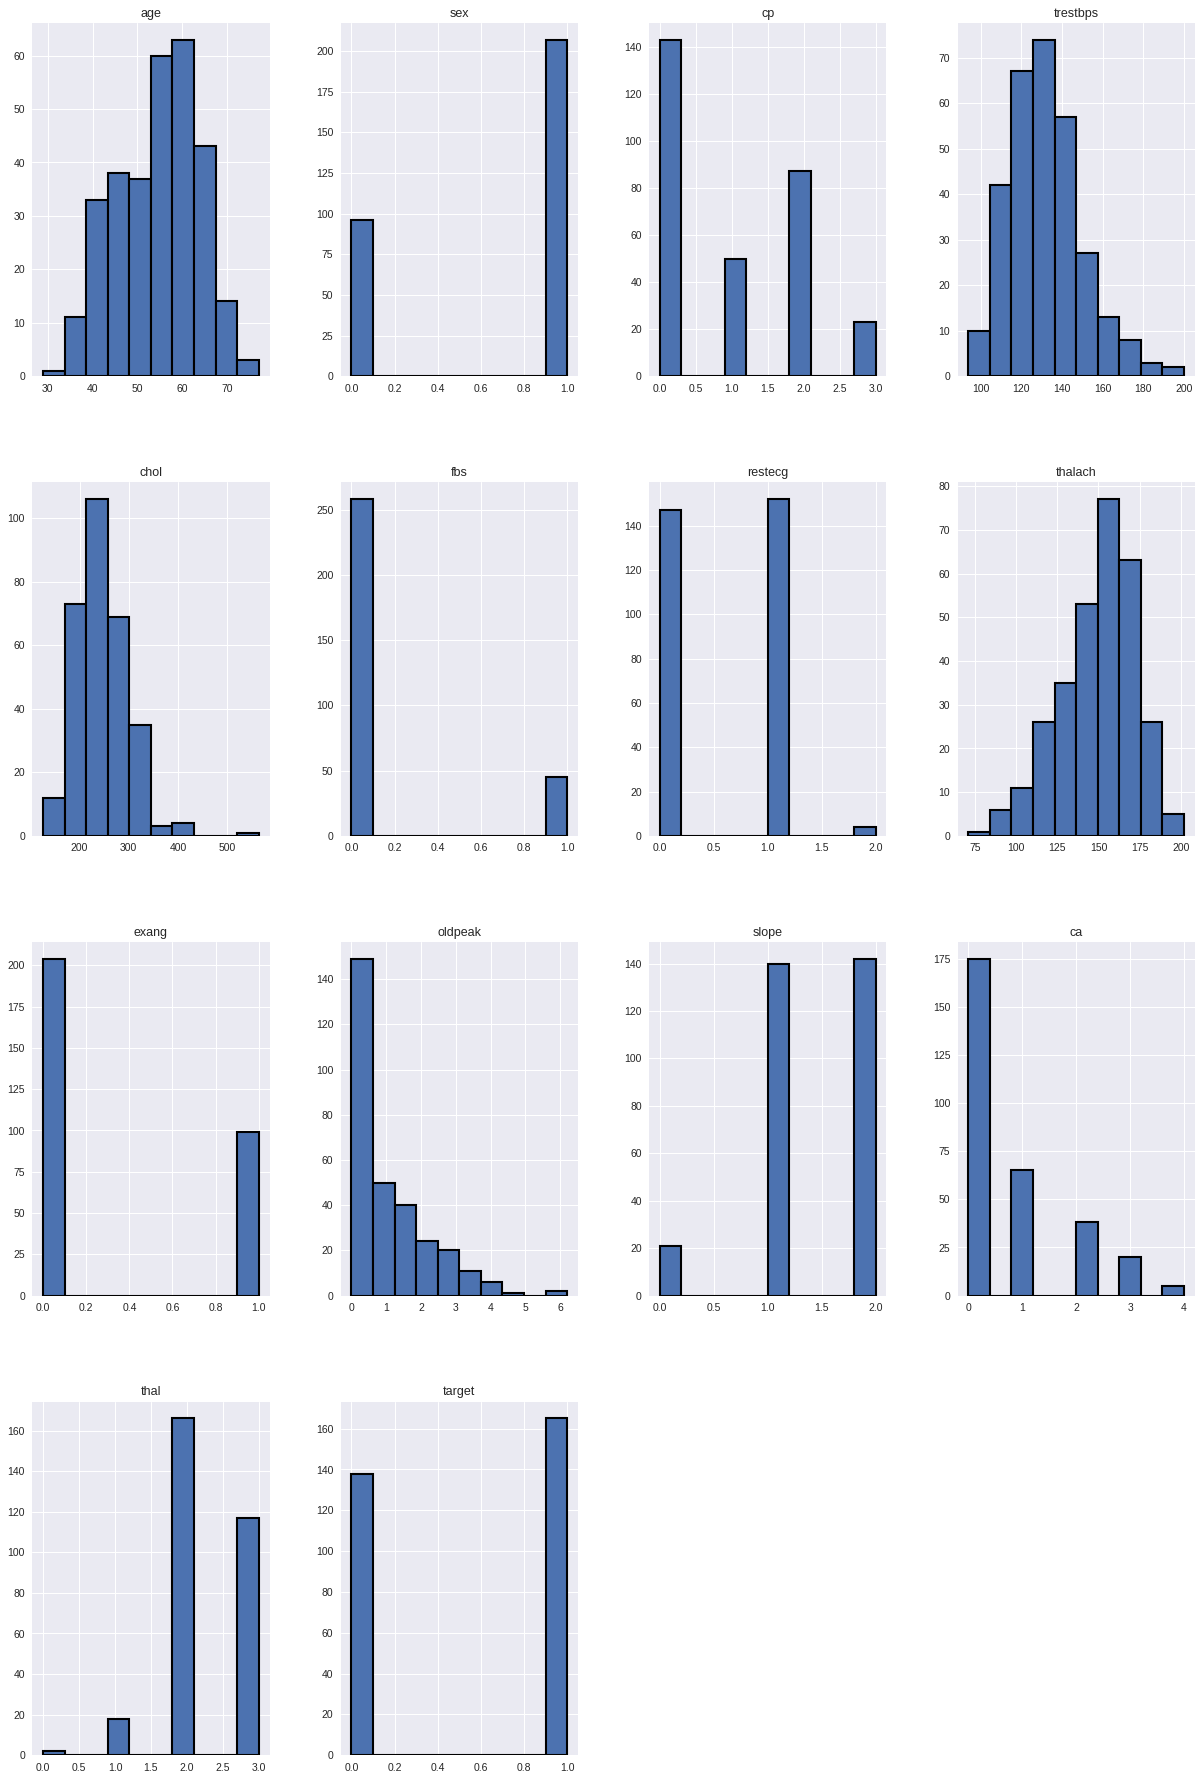

In [ ]:
df.hist(edgecolor='black',linewidth=2.0,figsize=(20,30))

# II. Training and Testing Data Set

# 1. Logistic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'target' is the binary outcome variable
y = df['target']

# Assuming 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak' are the features
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Logistic Regression model with default hyperparameters
default_model = LogisticRegression()

# Fit the model to the training data
default_model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train_default = default_model.predict(X_train)

# Make predictions on the test set
y_pred_test_default = default_model.predict(X_test)

# Evaluate the default model
accuracy_train_default = accuracy_score(y_train, y_pred_train_default)
accuracy_test_default = accuracy_score(y_test, y_pred_test_default)

conf_matrix_train_default = confusion_matrix(y_train, y_pred_train_default)
conf_matrix_test_default = confusion_matrix(y_test, y_pred_test_default)

class_report_train_default = classification_report(y_train, y_pred_train_default)
class_report_test_default = classification_report(y_test, y_pred_test_default)

print("Default Model - Training Set:")
print("Accuracy:", accuracy_train_default)
print("Confusion Matrix:\n", conf_matrix_train_default)
print("Classification Report:\n", class_report_train_default)

print("\nDefault Model - Test Set:")
print("Accuracy:", accuracy_test_default)
print("Confusion Matrix:\n", conf_matrix_test_default)
print("Classification Report:\n", class_report_test_default)

# Hyperparameter tuning using Grid Search Cross-Validation
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_

# Evaluate the best model on the training set
best_model = grid_search.best_estimator_
y_pred_train_tuned = best_model.predict(X_train)

# Evaluate the tuned model on the test set
y_pred_test_tuned = best_model.predict(X_test)

accuracy_train_tuned = accuracy_score(y_train, y_pred_train_tuned)
accuracy_test_tuned = accuracy_score(y_test, y_pred_test_tuned)

conf_matrix_train_tuned = confusion_matrix(y_train, y_pred_train_tuned)
conf_matrix_test_tuned = confusion_matrix(y_test, y_pred_test_tuned)

class_report_train_tuned = classification_report(y_train, y_pred_train_tuned)
class_report_test_tuned = classification_report(y_test, y_pred_test_tuned)

print("\nTuned Model - Training Set:")
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy_train_tuned)
print("Confusion Matrix (Tuned):\n", conf_matrix_train_tuned)
print("Classification Report (Tuned):\n", class_report_train_tuned)

print("\nTuned Model - Test Set:")
print("Accuracy:", accuracy_test_tuned)
print("Confusion Matrix (Tuned):\n", conf_matrix_test_tuned)
print("Classification Report (Tuned):\n", class_report_test_tuned)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef

Default Model - Training Set:
Accuracy: 0.8553719008264463
Confusion Matrix:
 [[ 84  25]
 [ 10 123]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.77      0.83       109
           1       0.83      0.92      0.88       133

    accuracy                           0.86       242
   macro avg       0.86      0.85      0.85       242
weighted avg       0.86      0.86      0.85       242


Default Model - Test Set:
Accuracy: 0.8852459016393442
Confusion Matrix:
 [[25  4]
 [ 3 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

Fitting 5 folds for each of 28 candidates, totalling 140 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 


Tuned Model - Training Set:
Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.8512396694214877
Confusion Matrix (Tuned):
 [[ 85  24]
 [ 12 121]]
Classification Report (Tuned):
               precision    recall  f1-score   support

           0       0.88      0.78      0.83       109
           1       0.83      0.91      0.87       133

    accuracy                           0.85       242
   macro avg       0.86      0.84      0.85       242
weighted avg       0.85      0.85      0.85       242


Tuned Model - Test Set:
Accuracy: 0.8688524590163934
Confusion Matrix (Tuned):
 [[25  4]
 [ 4 28]]
Classification Report (Tuned):
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
# Evaluate the tuned model on the test set
y_pred_test_tuned = best_model.predict(X_test)
y_pred_prob_tuned = best_model.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

# Set a custom threshold (adjust as needed)
custom_threshold_tuned = 0.3

# Convert probability scores to binary predictions based on the custom threshold
y_pred_adjusted_tuned = [1 if prob >= custom_threshold_tuned else 0 for prob in y_pred_prob_tuned]

# Evaluate accuracy with the custom threshold
accuracy_custom_threshold_tuned = accuracy_score(y_test, y_pred_adjusted_tuned)
conf_matrix_custom_threshold_tuned = confusion_matrix(y_test, y_pred_adjusted_tuned)
class_report_custom_threshold_tuned = classification_report(y_test, y_pred_adjusted_tuned)

print("\nTuned Model with Adjusted Threshold - Test Set:")
print(f"Custom Threshold :{custom_threshold_tuned}")
print("Accuracy with Custom Threshold: {accuracy_custom_threshold_tuned}")
print("Confusion Matrix (Custom Threshold):\n", conf_matrix_custom_threshold_tuned)
print("Classification Report (Custom Threshold):\n", class_report_custom_threshold_tuned)


Tuned Model with Adjusted Threshold - Test Set:
Custom Threshold :0.3
Accuracy with Custom Threshold: {accuracy_custom_threshold_tuned}
Confusion Matrix (Custom Threshold):
 [[25  4]
 [ 3 29]]
Classification Report (Custom Threshold):
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# 2a. LASSO

Cross-Validation Scores: [0.80327869 0.85245902 0.85245902 0.85       0.75      ]
Average Accuracy: 0.8216393442622951
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Hyperparameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


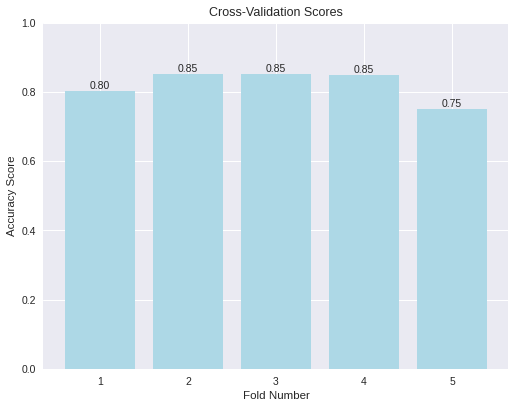


Training Set Evaluation with Best Parameters:
Accuracy: 0.8636363636363636
Confusion Matrix:
 [[ 87  22]
 [ 11 122]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84       109
           1       0.85      0.92      0.88       133

    accuracy                           0.86       242
   macro avg       0.87      0.86      0.86       242
weighted avg       0.87      0.86      0.86       242


Test Set Evaluation with Best Parameters:
Accuracy: 0.8524590163934426
Confusion Matrix:
 [[25  4]
 [ 5 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load or define your dataframe (df) here

# Assuming 'target' is the binary outcome variable
y = df['target']
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]

# Cross-Validation
lasso_model = LogisticRegression(penalty='l1', solver='liblinear')
scores = cross_val_score(lasso_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Plotting the cross-validation scores
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), scores, color='lightblue')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy Score')
plt.title('Cross-Validation Scores')
plt.ylim(0.0, 1.0)  # Set y-axis limits between 0 and 1
plt.xticks(range(1, 6))  # Set x-axis ticks for each fold
for i, score in enumerate(scores, start=1):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')  # Annotate each bar with its value
plt.show()

# Evaluate with Best Parameters on Training Set
best_model = grid_search.best_estimator_
y_pred_train_best = best_model.predict(X_train)

accuracy_train_best = accuracy_score(y_train, y_pred_train_best)
conf_matrix_train_best = confusion_matrix(y_train, y_pred_train_best)
class_report_train_best = classification_report(y_train, y_pred_train_best)

print("\nTraining Set Evaluation with Best Parameters:")
print("Accuracy:", accuracy_train_best)
print("Confusion Matrix:\n", conf_matrix_train_best)
print("Classification Report:\n", class_report_train_best)

# Evaluate with Best Parameters on Test Set
y_pred_test_best = best_model.predict(X_test)

accuracy_test_best = accuracy_score(y_test, y_pred_test_best)
conf_matrix_test_best = confusion_matrix(y_test, y_pred_test_best)
class_report_test_best = classification_report(y_test, y_pred_test_best)

print("\nTest Set Evaluation with Best Parameters:")
print("Accuracy:", accuracy_test_best)
print("Confusion Matrix:\n", conf_matrix_test_best)
print("Classification Report:\n", class_report_test_best)

In [ ]:
# ...

# Hyperparameter Tuning with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Display the coefficients
coefficients = best_model.coef_[0]
feature_names = X.columns

# Identify dropped variables (those with coefficient exactly equal to zero)
dropped_variables = [feature_names[i] for i, coef in enumerate(coefficients) if coef == 0]

print("Coefficients:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")

print("\nDropped Variables:", dropped_variables)

# ...


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Coefficients:
age: -0.008094380033236422
sex: -1.7741553817340787
cp: 0.8589621460350765
trestbps: -0.017475013723303
chol: -0.0037370965248862613
fbs: 0.2874053399383259
restecg: 0.5910595663543371
thalach: 0.019061846084664276
exang: -1.1517298237895934
oldpeak: -0.6570767458708199
slope: 0.7628319447998023
ca: -0.8551208915044007
thal: -1.0029328619391762

Dropped Variables: []


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Coefficients:
age: 0.006480340234201159
sex: -1.354775645299018
cp: 0.7894344392200833
trestbps: -0.012590658057126343
chol: -0.0023452396902129405
fbs: 0.1283404213268178
restecg: 0.5216590209637868
thalach: 0.025961867421188653
exang: -0.8908497710378879
oldpeak: -0.6144089285117992
slope: 0.6616239363955506
ca: -0.770626922808562
thal: -0.8579638854102788

Dropped Variables: []


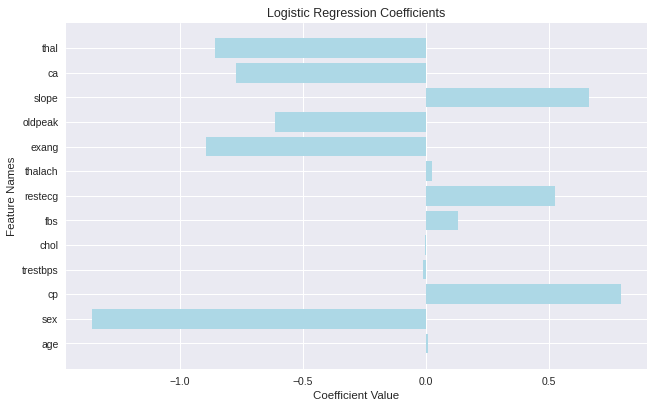

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ...

# Hyperparameter Tuning with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Display the coefficients
coefficients = best_model.coef_[0]
feature_names = X.columns

# Identify dropped variables (those with coefficient exactly equal to zero)
dropped_variables = [feature_names[i] for i, coef in enumerate(coefficients) if coef == 0]

print("Coefficients:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")

print("\nDropped Variables:", dropped_variables)

# Plotting the coefficients
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(feature_names, coefficients, color='lightblue')
ax.set_title('Logistic Regression Coefficients')
ax.set_xlabel('Coefficient Value')
ax.set_ylabel('Feature Names')

# Highlight dropped variables in red
for dropped_variable in dropped_variables:
    index = feature_names.get_loc(dropped_variable)
    ax.barh(dropped_variable, coefficients[index], color='red')

plt.show()


Cross-Validation Scores: [0.80327869 0.85245902 0.85245902 0.85       0.75      ]
Average Accuracy: 0.8216393442622951
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Hyperparameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


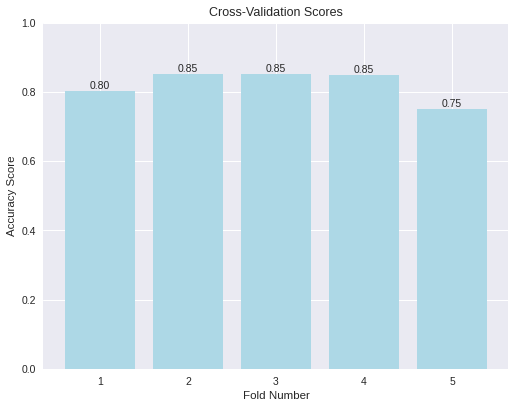


Training Set Evaluation with Best Parameters:
Accuracy: 0.8636363636363636
Confusion Matrix:
 [[ 87  22]
 [ 11 122]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84       109
           1       0.85      0.92      0.88       133

    accuracy                           0.86       242
   macro avg       0.87      0.86      0.86       242
weighted avg       0.87      0.86      0.86       242


Test Set Evaluation with Best Parameters:
Accuracy: 0.8524590163934426
Confusion Matrix:
 [[25  4]
 [ 5 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load or define your dataframe (df) here

# Assuming 'target' is the binary outcome variable
y = df['target']
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]

# Cross-Validation
lasso_model = LogisticRegression(penalty='l1', solver='liblinear')
scores = cross_val_score(lasso_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Plotting the cross-validation scores
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), scores, color='lightblue')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy Score')
plt.title('Cross-Validation Scores')
plt.ylim(0.0, 1.0)  # Set y-axis limits between 0 and 1
plt.xticks(range(1, 6))  # Set x-axis ticks for each fold
for i, score in enumerate(scores, start=1):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')  # Annotate each bar with its value
plt.show()

# Evaluate with Best Parameters on Training Set
best_model = grid_search.best_estimator_
y_pred_train_best = best_model.predict(X_train)

accuracy_train_best = accuracy_score(y_train, y_pred_train_best)
conf_matrix_train_best = confusion_matrix(y_train, y_pred_train_best)
class_report_train_best = classification_report(y_train, y_pred_train_best)

print("\nTraining Set Evaluation with Best Parameters:")
print("Accuracy:", accuracy_train_best)
print("Confusion Matrix:\n", conf_matrix_train_best)
print("Classification Report:\n", class_report_train_best)

# Evaluate with Best Parameters on Test Set
y_pred_test_best = best_model.predict(X_test)

accuracy_test_best = accuracy_score(y_test, y_pred_test_best)
conf_matrix_test_best = confusion_matrix(y_test, y_pred_test_best)
class_report_test_best = classification_report(y_test, y_pred_test_best)

print("\nTest Set Evaluation with Best Parameters:")
print("Accuracy:", accuracy_test_best)
print("Confusion Matrix:\n", conf_matrix_test_best)
print("Classification Report:\n", class_report_test_best)

In [ ]:
# Evaluate with Best Parameters on Test Set
y_pred_prob_test_best = best_model.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

# Set a custom threshold for the test set (adjust as needed)
custom_threshold_test = 0.3

# Convert probability scores to binary predictions based on the custom threshold
y_pred_adjusted_test = [1 if prob >= custom_threshold_test else 0 for prob in y_pred_prob_test_best]

# Evaluate accuracy with the custom threshold on the test set
accuracy_custom_threshold_test = accuracy_score(y_test, y_pred_adjusted_test)
conf_matrix_custom_threshold_test = confusion_matrix(y_test, y_pred_adjusted_test)
class_report_custom_threshold_test = classification_report(y_test, y_pred_adjusted_test)

print(f"\nTest Set Evaluation with Best Parameters and Adjusted Threshold ({custom_threshold_test}):")
print("Accuracy with Custom Threshold:", accuracy_custom_threshold_test)
print("Confusion Matrix with Custom Threshold:\n", conf_matrix_custom_threshold_test)
print("Classification Report with Custom Threshold:\n", class_report_custom_threshold_test)


Test Set Evaluation with Best Parameters and Adjusted Threshold (0.3):
Accuracy with Custom Threshold: 0.8852459016393442
Confusion Matrix with Custom Threshold:
 [[25  4]
 [ 3 29]]
Classification Report with Custom Threshold:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



LASSO w/ higher Lambda Penalty - No Change

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load or define your dataframe (df) here

# Assuming 'target' is the binary outcome variable
y = df['target']
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]

# Cross-Validation
lasso_model = LogisticRegression(penalty='l1', solver='liblinear')
scores = cross_val_score(lasso_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],  # Decrease C for stronger regularization
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate with Best Parameters on Test Set
best_model = grid_search.best_estimator_
y_pred_train_best = best_model.predict(X_train)

accuracy_train_best = accuracy_score(y_train, y_pred_train_best)
conf_matrix_train_best = confusion_matrix(y_train, y_pred_train_best)
class_report_train_best = classification_report(y_train, y_pred_train_best)

print("\nTraining Set Evaluation with Best Parameters:")
print("Accuracy:", accuracy_train_best)
print("Confusion Matrix:\n", conf_matrix_train_best)
print("Classification Report:\n", class_report_train_best)

# Evaluate with Best Parameters on Test Set
y_pred_test_best = best_model.predict(X_test)

accuracy_test_best = accuracy_score(y_test, y_pred_test_best)
conf_matrix_test_best = confusion_matrix(y_test, y_pred_test_best)
class_report_test_best = classification_report(y_test, y_pred_test_best)

print("\nTest Set Evaluation with Best Parameters:")
print("Accuracy:", accuracy_test_best)
print("Confusion Matrix:\n", conf_matrix_test_best)
print("Classification Report:\n", class_report_test_best)
# Evaluate with Best Parameters on Test Set
y_pred_prob_test_best = best_model.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

# Set a custom threshold for the test set (adjust as needed)
custom_threshold_test = 0.3

# Convert probability scores to binary predictions based on the custom threshold
y_pred_adjusted_test = [1 if prob >= custom_threshold_test else 0 for prob in y_pred_prob_test_best]

# Evaluate accuracy with the custom threshold on the test set
accuracy_custom_threshold_test = accuracy_score(y_test, y_pred_adjusted_test)
conf_matrix_custom_threshold_test = confusion_matrix(y_test, y_pred_adjusted_test)
class_report_custom_threshold_test = classification_report(y_test, y_pred_adjusted_test)

print(f"\nTest Set Evaluation with Best Parameters and Adjusted Threshold ({custom_threshold_test}):")
print("Accuracy with Custom Threshold:", accuracy_custom_threshold_test)
print("Confusion Matrix with Custom Threshold:\n", conf_matrix_custom_threshold_test)
print("Classification Report with Custom Threshold:\n", class_report_custom_threshold_test)

Cross-Validation Scores: [0.80327869 0.85245902 0.85245902 0.85       0.75      ]
Average Accuracy: 0.8216393442622951
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

Training Set Evaluation with Best Parameters:
Accuracy: 0.8512396694214877
Confusion Matrix:
 [[ 85  24]
 [ 12 121]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83       109
           1       0.83      0.91      0.87       133

    accuracy                           0.85       242
   macro avg       0.86      0.84      0.85       242
weighted avg       0.85      0.85      0.85       242


Test Set Evaluation with Best Parameters:
Accuracy: 0.8688524590163934
Confusion Matrix:
 [[25  4]
 [ 4 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88    

In [ ]:
# Evaluate with Best Parameters on Test Set
y_pred_prob_test_best = best_model.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

# Set a custom threshold for the test set (adjust as needed)
custom_threshold_test = 0.3

# Convert probability scores to binary predictions based on the custom threshold
y_pred_adjusted_test = [1 if prob >= custom_threshold_test else 0 for prob in y_pred_prob_test_best]

# Evaluate accuracy with the custom threshold on the test set
accuracy_custom_threshold_test = accuracy_score(y_test, y_pred_adjusted_test)
conf_matrix_custom_threshold_test = confusion_matrix(y_test, y_pred_adjusted_test)
class_report_custom_threshold_test = classification_report(y_test, y_pred_adjusted_test)

print(f"\nTest Set Evaluation with Best Parameters and Adjusted Threshold ({custom_threshold_test}):")
print("Accuracy with Custom Threshold:", accuracy_custom_threshold_test)
print("Confusion Matrix with Custom Threshold:\n", conf_matrix_custom_threshold_test)
print("Classification Report with Custom Threshold:\n", class_report_custom_threshold_test)


Test Set Evaluation with Best Parameters and Adjusted Threshold (0.3):
Accuracy with Custom Threshold: 0.8852459016393442
Confusion Matrix with Custom Threshold:
 [[25  4]
 [ 3 29]]
Classification Report with Custom Threshold:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# 2. Ridge

Cross-Validation Scores: [0.81967213 0.86885246 0.85245902 0.85       0.71666667]
Average Accuracy: 0.8215300546448088
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


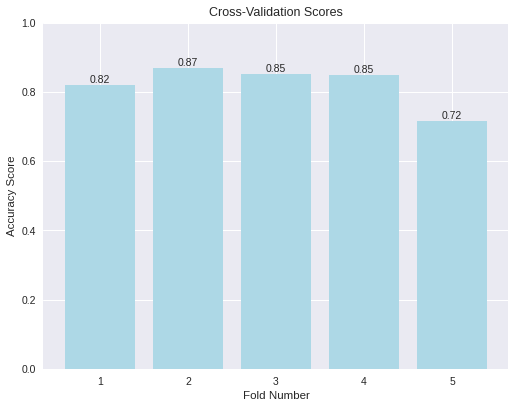


Training Set Evaluation with Best Parameters:
Accuracy: 0.8512396694214877
Confusion Matrix:
 [[ 85  24]
 [ 12 121]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83       109
           1       0.83      0.91      0.87       133

    accuracy                           0.85       242
   macro avg       0.86      0.84      0.85       242
weighted avg       0.85      0.85      0.85       242


Test Set Evaluation with Best Parameters:
Accuracy: 0.8688524590163934
Confusion Matrix:
 [[25  4]
 [ 4 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load or define your dataframe (df) here

# Assuming 'target' is the binary outcome variable
y = df['target']
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]

# Cross-Validation
ridge_model = LogisticRegression(penalty='l2', solver='liblinear')
scores = cross_val_score(ridge_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Plotting the cross-validation scores
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), scores, color='lightblue')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy Score')
plt.title('Cross-Validation Scores')
plt.ylim(0.0, 1.0)  # Set y-axis limits between 0 and 1
plt.xticks(range(1, 6))  # Set x-axis ticks for each fold
for i, score in enumerate(scores, start=1):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')  # Annotate each bar with its value
plt.show()

# Evaluate with Best Parameters on Training Set
best_model = grid_search.best_estimator_
y_pred_train_best = best_model.predict(X_train)

accuracy_train_best = accuracy_score(y_train, y_pred_train_best)
conf_matrix_train_best = confusion_matrix(y_train, y_pred_train_best)
class_report_train_best = classification_report(y_train, y_pred_train_best)

print("\nTraining Set Evaluation with Best Parameters:")
print("Accuracy:", accuracy_train_best)
print("Confusion Matrix:\n", conf_matrix_train_best)
print("Classification Report:\n", class_report_train_best)

# Evaluate with Best Parameters on Test Set
y_pred_test_best = best_model.predict(X_test)

accuracy_test_best = accuracy_score(y_test, y_pred_test_best)
conf_matrix_test_best = confusion_matrix(y_test, y_pred_test_best)
class_report_test_best = classification_report(y_test, y_pred_test_best)

print("\nTest Set Evaluation with Best Parameters:")
print("Accuracy:", accuracy_test_best)
print("Confusion Matrix:\n", conf_matrix_test_best)
print("Classification Report:\n", class_report_test_best)

In [ ]:
# Evaluate with Best Parameters on Test Set
y_pred_prob_test_best = best_model.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

# Set a custom threshold for the test set (adjust as needed)
custom_threshold_test = 0.3

# Convert probability scores to binary predictions based on the custom threshold
y_pred_adjusted_test = [1 if prob >= custom_threshold_test else 0 for prob in y_pred_prob_test_best]

# Evaluate accuracy with the custom threshold on the test set
accuracy_custom_threshold_test = accuracy_score(y_test, y_pred_adjusted_test)
conf_matrix_custom_threshold_test = confusion_matrix(y_test, y_pred_adjusted_test)
class_report_custom_threshold_test = classification_report(y_test, y_pred_adjusted_test)

print(f"\nTest Set Evaluation with Best Parameters and Adjusted Threshold ({custom_threshold_test}):")
print("Accuracy with Custom Threshold:", accuracy_custom_threshold_test)
print("Confusion Matrix with Custom Threshold:\n", conf_matrix_custom_threshold_test)
print("Classification Report with Custom Threshold:\n", class_report_custom_threshold_test)


Test Set Evaluation with Best Parameters and Adjusted Threshold (0.3):
Accuracy with Custom Threshold: 0.8852459016393442
Confusion Matrix with Custom Threshold:
 [[25  4]
 [ 3 29]]
Classification Report with Custom Threshold:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# 2c. Elastic Net

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Cross-Validation Scores: [0.67213115 0.67213115 0.7704918  0.75       0.68333333]
Average Accuracy: 0.7096174863387977
Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Hyperparameters: {'C': 0.01, 'l1_ratio': 0.9, 'penalty': 'elasticnet', 'solver': 'saga'}


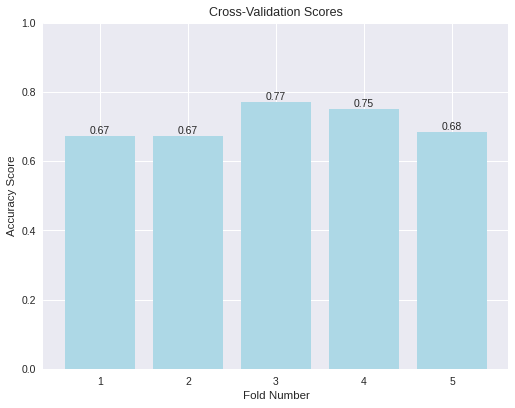


Training Set Evaluation with Best Parameters:
Accuracy: 0.6859504132231405
Confusion Matrix:
 [[ 60  49]
 [ 27 106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.55      0.61       109
           1       0.68      0.80      0.74       133

    accuracy                           0.69       242
   macro avg       0.69      0.67      0.67       242
weighted avg       0.69      0.69      0.68       242


Test Set Evaluation with Best Parameters:
Accuracy: 0.7868852459016393
Confusion Matrix:
 [[22  7]
 [ 6 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.77        29
           1       0.79      0.81      0.80        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load or define your dataframe (df) here

# Assuming 'target' is the binary outcome variable
y = df['target']
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]

# Cross-Validation
elastic_net_model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
scores = cross_val_score(elastic_net_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['elasticnet'],
    'solver': ['saga'],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

grid_search = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Plotting the cross-validation scores
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), scores, color='lightblue')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy Score')
plt.title('Cross-Validation Scores')
plt.ylim(0.0, 1.0)  # Set y-axis limits between 0 and 1
plt.xticks(range(1, 6))  # Set x-axis ticks for each fold
for i, score in enumerate(scores, start=1):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')  # Annotate each bar with its value
plt.show()

# Evaluate with Best Parameters on Training Set
best_model = grid_search.best_estimator_
y_pred_train_best = best_model.predict(X_train)

accuracy_train_best = accuracy_score(y_train, y_pred_train_best)
conf_matrix_train_best = confusion_matrix(y_train, y_pred_train_best)
class_report_train_best = classification_report(y_train, y_pred_train_best)

print("\nTraining Set Evaluation with Best Parameters:")
print("Accuracy:", accuracy_train_best)
print("Confusion Matrix:\n", conf_matrix_train_best)
print("Classification Report:\n", class_report_train_best)

# Evaluate with Best Parameters on Test Set
y_pred_test_best = best_model.predict(X_test)

accuracy_test_best = accuracy_score(y_test, y_pred_test_best)
conf_matrix_test_best = confusion_matrix(y_test, y_pred_test_best)
class_report_test_best = classification_report(y_test, y_pred_test_best)

print("\nTest Set Evaluation with Best Parameters:")
print("Accuracy:", accuracy_test_best)
print("Confusion Matrix:\n", conf_matrix_test_best)
print("Classification Report:\n", class_report_test_best)

In [ ]:
# Evaluate with Best Parameters on Test Set
y_pred_prob_test_best = best_model.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

# Set a custom threshold for the test set (adjust as needed)
custom_threshold_test = 0.5

# Convert probability scores to binary predictions based on the custom threshold
y_pred_adjusted_test = [1 if prob >= custom_threshold_test else 0 for prob in y_pred_prob_test_best]

# Evaluate accuracy with the custom threshold on the test set
accuracy_custom_threshold_test = accuracy_score(y_test, y_pred_adjusted_test)
conf_matrix_custom_threshold_test = confusion_matrix(y_test, y_pred_adjusted_test)
class_report_custom_threshold_test = classification_report(y_test, y_pred_adjusted_test)

print(f"\nTest Set Evaluation with Best Parameters and Adjusted Threshold ({custom_threshold_test}):")
print("Accuracy with Custom Threshold:", accuracy_custom_threshold_test)
print("Confusion Matrix with Custom Threshold:\n", conf_matrix_custom_threshold_test)
print("Classification Report with Custom Threshold:\n", class_report_custom_threshold_test)


Test Set Evaluation with Best Parameters and Adjusted Threshold (0.5):
Accuracy with Custom Threshold: 0.7868852459016393
Confusion Matrix with Custom Threshold:
 [[22  7]
 [ 6 26]]
Classification Report with Custom Threshold:
               precision    recall  f1-score   support

           0       0.79      0.76      0.77        29
           1       0.79      0.81      0.80        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



# 3. Decision Tree

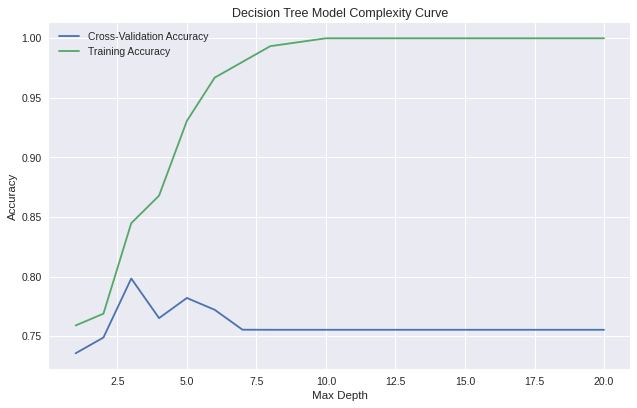

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'heart_data' is a classification dataset with a 'target' column.
heart_data = df
X = heart_data.drop('target', axis=1)  # Features
y = heart_data['target']  # Target variable

# Define a range of max_depth values to iterate over
max_depth_values = np.arange(1, 21)

# Lists to store the average cross-validation score and the training score for each value of max_depth
cvs = []
train_scores = []

# Iterate over the defined range of max_depth values
for depth in max_depth_values:
    # Initialize the DecisionTreeClassifier with the current max_depth value
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # Perform cross-validation and store the mean score
    cv_scores = cross_val_score(tree_clf, X, y, cv=5, scoring='accuracy')
    cvs.append(np.mean(cv_scores))

    # Fit the model to the training data and calculate the training score
    tree_clf.fit(X, y)
    train_scores.append(tree_clf.score(X, y))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, cvs, label='Cross-Validation Accuracy')
plt.plot(max_depth_values, train_scores, label='Training Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Model Complexity Curve')
plt.legend()
plt.show()

We see that  the training accuracy increases with the depth of the tree, which is indicative of the model fitting the training data better.
However, the cross-validation accuracy peaks at depth = 3
Using Depth = 3, we get best fit

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming 'df' is your DataFrame and 'target' is the binary outcome variable
y = df['target']
X = df.drop('target', axis=1)  # Dropping the target column to keep only features

# Split the dataset into training and test sets with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier object with max_depth set to 3
clf = DecisionTreeClassifier(max_depth=3)

# Train the Decision Tree Classifier using the training data
clf.fit(X_train, y_train)

# Predict the target values for the training set
y_pred_train = clf.predict(X_train)

# Predict the target values for the test set
y_pred_test = clf.predict(X_test)

# Calculate the accuracy of the model on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training Set Accuracy:", accuracy_train)

# Compute and print the confusion matrix for the training set
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix (Training Set):\n", conf_matrix_train)

# Generate and print the classification report for the training set
class_report_train = classification_report(y_train, y_pred_train)
print("Classification Report (Training Set):\n", class_report_train)

# Calculate the accuracy of the model on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("\nTest Set Accuracy:", accuracy_test)

# Compute and print the confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix (Test Set):\n", conf_matrix_test)

# Generate and print the classification report for the test set
class_report_test = classification_report(y_test, y_pred_test)
print("Classification Report (Test Set):\n", class_report_test)

Training Set Accuracy: 0.8471074380165289
Confusion Matrix (Training Set):
 [[ 82  27]
 [ 10 123]]
Classification Report (Training Set):
               precision    recall  f1-score   support

           0       0.89      0.75      0.82       109
           1       0.82      0.92      0.87       133

    accuracy                           0.85       242
   macro avg       0.86      0.84      0.84       242
weighted avg       0.85      0.85      0.85       242


Test Set Accuracy: 0.819672131147541
Confusion Matrix (Test Set):
 [[24  5]
 [ 6 26]]
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming 'df' is your DataFrame and 'target' is the binary outcome variable
y = df['target']
X = df.drop('target', axis=1)  # Dropping the target column to keep only features

# Split the dataset into training and test sets with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Decision Tree classifier object with max_depth set to 3
clf = DecisionTreeClassifier(max_depth=3)

# Train the Decision Tree Classifier using the training data
clf.fit(X_train, y_train)

# Predict the probabilities of the positive class for the test set
y_pred_prob_test = clf.predict_proba(X_test)[:, 1]

# Set a custom threshold for classification (adjust as needed)
custom_threshold = 0.4

# Convert probability scores to binary predictions based on the custom threshold
y_pred_adjusted_test = [1 if prob >= custom_threshold else 0 for prob in y_pred_prob_test]

# Calculate the confusion matrix, accuracy, and other metrics for the adjusted threshold
conf_matrix_adjusted_test = confusion_matrix(y_test, y_pred_adjusted_test)
accuracy_adjusted_test = accuracy_score(y_test, y_pred_adjusted_test)
class_report_adjusted_test = classification_report(y_test, y_pred_adjusted_test)

# Print results for the test set with the adjusted threshold
print("\nTest Set with Adjusted Threshold:")
print("Custom Threshold:", custom_threshold)
print("Confusion Matrix:\n", conf_matrix_adjusted_test)
print("Accuracy with Custom Threshold:", accuracy_adjusted_test)
print("Classification Report:\n", class_report_adjusted_test)


Test Set with Adjusted Threshold:
Custom Threshold: 0.4
Confusion Matrix:
 [[19  8]
 [ 2 32]]
Accuracy with Custom Threshold: 0.8360655737704918
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.70      0.79        27
           1       0.80      0.94      0.86        34

    accuracy                           0.84        61
   macro avg       0.85      0.82      0.83        61
weighted avg       0.85      0.84      0.83        61



# 4. Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'target' is the binary outcome variable
y = df['target']

# Assuming 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak' are the features
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150, 1000],
    'max_depth': [None, 10, 20, 30]
}

# Instantiate the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Instantiate the Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(random_state=42, **best_params)

# Fit the model to the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val = best_rf_model.predict(X_val)

# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
conf_matrix_val = confusion_matrix(y_val, y_pred_val)
class_report_val = classification_report(y_val, y_pred_val)

# Print results for the validation set
print("Best Parameters from Grid Search:", best_params)
print("Validation Set:")
print("Accuracy:", accuracy_val)
print("Confusion Matrix:\n", conf_matrix_val)
print("Classification Report:\n", class_report_val)

# Make predictions on the training set
y_pred_train = best_rf_model.predict(X_train)

# Evaluate the model on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
class_report_train = classification_report(y_train, y_pred_train)

# Print results for the training set
print("\nTraining Set:")
print("Accuracy:", accuracy_train)
print("Confusion Matrix:\n", conf_matrix_train)
print("Classification Report:\n", class_report_train)

# Make predictions on the test set
y_pred_test = best_rf_model.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
class_report_test = classification_report(y_test, y_pred_test)

# Print results for the test set
print("\nTest Set:")
print("Accuracy:", accuracy_test)
print("Confusion Matrix:\n", conf_matrix_test)
print("Classification Report:\n", class_report_test)

Best Parameters from Grid Search: {'max_depth': None, 'n_estimators': 1000}
Validation Set:
Accuracy: 0.8688524590163934
Confusion Matrix:
 [[25  3]
 [ 5 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86        28
           1       0.90      0.85      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61


Training Set:
Accuracy: 1.0
Confusion Matrix:
 [[86  0]
 [ 0 95]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00        95

    accuracy                           1.00       181
   macro avg       1.00      1.00      1.00       181
weighted avg       1.00      1.00      1.00       181


Test Set:
Accuracy: 0.819672131147541
Confusion Matrix:
 [[18  6]
 [ 5 

In [ ]:
# Make predictions on the test set
y_pred_prob_test = best_rf_model.predict_proba(X_test)[:, 1]

# Set a custom threshold for classification (adjust as needed)
custom_threshold = 0.4

# Convert probability scores to binary predictions based on the custom threshold
y_pred_adjusted_test = [1 if prob >= custom_threshold else 0 for prob in y_pred_prob_test]

# Evaluate the model on the test set with the adjusted threshold
accuracy_adjusted_test = accuracy_score(y_test, y_pred_adjusted_test)
conf_matrix_adjusted_test = confusion_matrix(y_test, y_pred_adjusted_test)
class_report_adjusted_test = classification_report(y_test, y_pred_adjusted_test)

# Print results for the test set with the adjusted threshold
print("\nTest Set with Adjusted Threshold:")
print("Custom Threshold:", custom_threshold)
print("Accuracy with Custom Threshold:", accuracy_adjusted_test)
print("Confusion Matrix:\n", conf_matrix_adjusted_test)
print("Classification Report:\n", class_report_adjusted_test)


Test Set with Adjusted Threshold:
Custom Threshold: 0.4
Accuracy with Custom Threshold: 0.819672131147541
Confusion Matrix:
 [[17  7]
 [ 4 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76        24
           1       0.82      0.89      0.86        37

    accuracy                           0.82        61
   macro avg       0.82      0.80      0.81        61
weighted avg       0.82      0.82      0.82        61



# 5. Bagging

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Assuming X and y are features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset into training set and test set with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Bagging classifier with a base DecisionTreeClassifier for hyperparameter tuning
base_bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

# Define the parameter grid for the Bagging classifier
param_grid = {
    'n_estimators': [10, 50, 100, 200, 1000],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
}

# Instantiate the GridSearchCV object with 5-fold cross-validation
cv_bagging_clf = GridSearchCV(base_bagging_clf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
cv_bagging_clf.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = cv_bagging_clf.best_params_
best_score = cv_bagging_clf.best_score_

# Print the best parameters and the best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Create a Bagging classifier with the best parameters
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(),
                                n_estimators=best_params['n_estimators'],
                                max_samples=best_params['max_samples'],
                                max_features=best_params['max_features'],
                                random_state=42)

# Fit the Bagging classifier to the training data
bagging_clf.fit(X_train, y_train)

# Evaluate the classifier on the training data
bagging_train_accuracy = bagging_clf.score(X_train, y_train)

# Evaluate the classifier on the test data
bagging_test_accuracy = bagging_clf.score(X_test, y_test)

# Predictions on the training set
y_train_pred = bagging_clf.predict(X_train)

# Confusion matrix and classification report for the training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_report_train = classification_report(y_train, y_train_pred)

print("Training accuracy:", bagging_train_accuracy)
print("Confusion Matrix (Training Set):\n", conf_matrix_train)
print("Classification Report (Training Set):\n", class_report_train)

# Predictions on the test set
y_test_pred = bagging_clf.predict(X_test)

# Confusion matrix and classification report for the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
class_report_test = classification_report(y_test, y_test_pred)

print("Test accuracy:", bagging_test_accuracy)
print("\nConfusion Matrix (Test Set):\n", conf_matrix_test)
print("Classification Report (Test Set):\n", class_report_test)

Best Parameters: {'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 1000}
Best Score: 0.8474489795918367
Training accuracy: 0.9669421487603306
Confusion Matrix (Training Set):
 [[105   6]
 [  2 129]]
Classification Report (Training Set):
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       111
           1       0.96      0.98      0.97       131

    accuracy                           0.97       242
   macro avg       0.97      0.97      0.97       242
weighted avg       0.97      0.97      0.97       242

Test accuracy: 0.8360655737704918

Confusion Matrix (Test Set):
 [[21  6]
 [ 4 30]]
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84   

In [ ]:
# Assuming 'bagging_clf' is the trained Bagging classifier
# Predict probabilities for the test set
y_test_probs = bagging_clf.predict_proba(X_test)[:, 1]

# Set your desired threshold (you can adjust this value)
custom_threshold = 0.4

# Adjust predictions based on the threshold
y_test_adjusted = [1 if prob >= custom_threshold else 0 for prob in y_test_probs]

# Confusion matrix and classification report for the adjusted predictions
accuracy_test_adjusted = accuracy_score(y_test, y_test_adjusted)
conf_matrix_test_adjusted = confusion_matrix(y_test, y_test_adjusted)
class_report_test_adjusted = classification_report(y_test, y_test_adjusted)

print("\nTest Set with Adjusted Threshold:")
print("Custom Threshold:", custom_threshold)
print("\nAccuracy with Custom Threshold:", accuracy_test_adjusted)
print("\nConfusion Matrix (Test Set - Adjusted):\n", conf_matrix_test_adjusted)
print("Classification Report (Test Set - Adjusted):\n", class_report_test_adjusted)


Test Set with Adjusted Threshold:
Custom Threshold: 0.4

Accuracy with Custom Threshold: 0.8360655737704918

Confusion Matrix (Test Set - Adjusted):
 [[19  8]
 [ 2 32]]
Classification Report (Test Set - Adjusted):
               precision    recall  f1-score   support

           0       0.90      0.70      0.79        27
           1       0.80      0.94      0.86        34

    accuracy                           0.84        61
   macro avg       0.85      0.82      0.83        61
weighted avg       0.85      0.84      0.83        61



# 6. Boosting

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Assuming X and y are features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset into training set and test set with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Gradient Boosting classifier for hyperparameter tuning
base_gb_clf = GradientBoostingClassifier(random_state=42)

# Define the parameter grid for the Gradient Boosting classifier
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# Instantiate the GridSearchCV object with 5-fold cross-validation
cv_gb_clf = GridSearchCV(base_gb_clf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
cv_gb_clf.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_gb = cv_gb_clf.best_params_
best_score_gb = cv_gb_clf.best_score_

# Print the best parameters and the best score
print("Best Parameters:", best_params_gb)
print("Best Score:", best_score_gb)

# Create a Gradient Boosting classifier with the best parameters
gb_clf = GradientBoostingClassifier(n_estimators=best_params_gb['n_estimators'],
                                    learning_rate=best_params_gb['learning_rate'],
                                    max_depth=best_params_gb['max_depth'],
                                    random_state=42)

# Fit the Gradient Boosting classifier to the training data
gb_clf.fit(X_train, y_train)

# Evaluate the classifier on the training data
gb_train_accuracy = gb_clf.score(X_train, y_train)

# Evaluate the classifier on the test data
gb_test_accuracy = gb_clf.score(X_test, y_test)

# Print the accuracies
print("Training accuracy:", gb_train_accuracy)
print("Test accuracy:", gb_test_accuracy)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best Score: 0.826530612244898
Training accuracy: 0.871900826446281
Test accuracy: 0.8360655737704918


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming X and y are features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset into training set and test set with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Gradient Boosting classifier for hyperparameter tuning
base_gb_clf = GradientBoostingClassifier(random_state=42)

# Define the parameter grid for the Gradient Boosting classifier
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# Instantiate the GridSearchCV object with 5-fold cross-validation
cv_gb_clf = GridSearchCV(base_gb_clf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
cv_gb_clf.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_gb = cv_gb_clf.best_params_
best_score_gb = cv_gb_clf.best_score_

# Print the best parameters and the best score
print("Best Parameters:", best_params_gb)
print("Best Score:", best_score_gb)

# Create a Gradient Boosting classifier with the best parameters
gb_clf = GradientBoostingClassifier(n_estimators=best_params_gb['n_estimators'],
                                    learning_rate=best_params_gb['learning_rate'],
                                    max_depth=best_params_gb['max_depth'],
                                    random_state=42)

# Fit the Gradient Boosting classifier to the training data
gb_clf.fit(X_train, y_train)

# Evaluate the classifier on the training data
gb_train_accuracy = gb_clf.score(X_train, y_train)

# Evaluate the classifier on the test data
gb_test_accuracy = gb_clf.score(X_test, y_test)

# Make predictions on both training and test sets
y_pred_train = gb_clf.predict(X_train)
y_pred_test = gb_clf.predict(X_test)

# Confusion matrix and classification report for the training set
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
class_report_train = classification_report(y_train, y_pred_train)

# Confusion matrix and classification report for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
class_report_test = classification_report(y_test, y_pred_test)

# Print the accuracies, confusion matrices and classification reports
print("Training accuracy:", gb_train_accuracy)
print("\nConfusion Matrix (Training Set):\n", conf_matrix_train)
print("Classification Report (Training Set):\n", class_report_train)
print("Test accuracy:", gb_test_accuracy)
print("\nConfusion Matrix (Test Set):\n", conf_matrix_test)
print("Classification Report (Test Set):\n", class_report_test)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best Score: 0.826530612244898
Training accuracy: 0.871900826446281

Confusion Matrix (Training Set):
 [[ 84  27]
 [  4 127]]
Classification Report (Training Set):
               precision    recall  f1-score   support

           0       0.95      0.76      0.84       111
           1       0.82      0.97      0.89       131

    accuracy                           0.87       242
   macro avg       0.89      0.86      0.87       242
weighted avg       0.88      0.87      0.87       242

Test accuracy: 0.8360655737704918

Confusion Matrix (Test Set):
 [[20  7]
 [ 3 31]]
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.87      0.74      0.80        27
           1       0.82      0.91      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0

In [ ]:
import numpy as np

# Assuming gb_clf is your trained Gradient Boosting classifier
# and X_test is your test set features

# Get predicted probabilities for class 1 (positive class)
y_probabilities = gb_clf.predict_proba(X_test)[:, 1]

# Set your desired threshold (e.g., 0.5)
custom_threshold = 0.5

# Adjust predictions based on the threshold
y_pred_adjusted = np.where(y_probabilities >= custom_threshold, 1, 0)

# Now you can calculate accuracy, confusion matrix, and classification report for the adjusted predictions
accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)
class_report_adjusted = classification_report(y_test, y_pred_adjusted)

# Print the results
print("\nTest Set with Adjusted Threshold:")
print("Custom Threshold:", custom_threshold)
print("Accuracy with Custom Threshold:", accuracy_adjusted)
print("Adjusted Confusion Matrix:\n", conf_matrix_adjusted)
print("Adjusted Classification Report:\n", class_report_adjusted)


Test Set with Adjusted Threshold:
Custom Threshold: 0.5
Accuracy with Custom Threshold: 0.8360655737704918
Adjusted Confusion Matrix:
 [[20  7]
 [ 3 31]]
Adjusted Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.74      0.80        27
           1       0.82      0.91      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61



# 7. K-Nearest Neighbors

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming X and y are features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset into training set and test set with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 21, 31],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Instantiate the KNN model
knn_model = KNeighborsClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Instantiate KNN with the best parameters
best_knn_model = KNeighborsClassifier(**best_params)

# Fit the model to the training data
best_knn_model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = best_knn_model.predict(X_train)

# Evaluate the model on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
class_report_train = classification_report(y_train, y_pred_train)

# Print results for the training set
print("Best Parameters from Grid Search:", best_params)
print("\nTraining Set:")
print("Accuracy:", accuracy_train)
print("Confusion Matrix:\n", conf_matrix_train)
print("Classification Report:\n", class_report_train)

# Make predictions on the test set
y_pred_test = best_knn_model.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
class_report_test = classification_report(y_test, y_pred_test)

# Print results for the test set
print("\nTest Set:")
print("Accuracy:", accuracy_test)
print("Confusion Matrix:\n", conf_matrix_test)
print("Classification Report:\n", class_report_test)

Best Parameters from Grid Search: {'n_neighbors': 21, 'p': 1, 'weights': 'distance'}

Training Set:
Accuracy: 1.0
Confusion Matrix:
 [[111   0]
 [  0 131]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00       131

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242


Test Set:
Accuracy: 0.7377049180327869
Confusion Matrix:
 [[19  8]
 [ 8 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.70      0.70        27
           1       0.76      0.76      0.76        34

    accuracy                           0.74        61
   macro avg       0.73      0.73      0.73        61
weighted avg       0.74      0.74      0.74        61



In [ ]:
# Make predictions on the test set with probability estimates
y_proba_test = best_knn_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Set a threshold
threshold = 0.4
y_pred_test_adjusted = (y_proba_test > threshold).astype(int)

# Evaluate the model on the adjusted test set
accuracy_test_adjusted = accuracy_score(y_test, y_pred_test_adjusted)
conf_matrix_test_adjusted = confusion_matrix(y_test, y_pred_test_adjusted)
class_report_test_adjusted = classification_report(y_test, y_pred_test_adjusted)

# Print results for the adjusted test set
print("\nAdjusted Test Set (Threshold = {}):".format(threshold))
print("Accuracy:", accuracy_test_adjusted)
print("Confusion Matrix:\n", conf_matrix_test_adjusted)
print("Classification Report:\n", class_report_test_adjusted)


Adjusted Test Set (Threshold = 0.4):
Accuracy: 0.7377049180327869
Confusion Matrix:
 [[13 14]
 [ 2 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.48      0.62        27
           1       0.70      0.94      0.80        34

    accuracy                           0.74        61
   macro avg       0.78      0.71      0.71        61
weighted avg       0.77      0.74      0.72        61



# III. Predictions

# Our Best Model: Logistic Regression

Create Dummy Data to Evaluate

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive/')

# Load the original dataset to understand its structure
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Team 4/heart.csv')

# Exclude the last column (target column) from the columns list
columns_without_target = df.columns[:-1]

# Create a dummy dataset with 100 rows based on the structure of the loaded dataset without the target column
np.random.seed(0)  # For reproducibility
dummy_data = pd.DataFrame({
    column: (np.random.normal(df[column].mean(), df[column].std(), 100)
             if df[column].dtype in [np.float64, np.int64] and len(df[column].unique()) > 10
             else np.random.choice(df[column].unique(), 100, replace=True))
    for column in columns_without_target
})

# Ensure the data types match
dummy_data = dummy_data.astype(df[columns_without_target].dtypes.to_dict())

# Save the dummy data to a CSV file
dummy_data.to_csv('/content/drive/MyDrive/Machine Learning Team 4/dummy_heart_data_100_rows_without_target.csv', index=False)

# Display the first 10 rows of the dummy data
print(dummy_data.head(10))

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang   oldpeak  \
0   70    1   0       113   212    1        1      144      0  0.223151   
1   58    1   1       143   226    0        2      160      1  1.950094   
2   63    0   2       117   271    1        0      188      0  0.931243   
3   74    0   1       119   240    1        0      121      1  0.500069   
4   71    0   2       123   141    1        1      145      0  0.828032   
5   45    1   1       131   353    0        1      171      0  2.214814   
6   62    0   3       125   240    0        2      153      1  1.391347   
7   52    0   1       107   299    0        0      165      0  0.865136   
8   53    0   3       120   210    1        0      194      1  1.678339   
9   58    0   2        92   325    1        0      116      0  2.606510   

   slope  ca  thal  
0      0   3     0  
1

Predictions

In [ ]:
import pandas as pd

# Load the data file into a DataFrame
new_data_file_path = '/content/drive/MyDrive/Machine Learning Team 4/dummy_heart_data_100_rows_without_target.csv'
new_data = pd.read_csv(new_data_file_path)

# Use the best_model to get the probability of the positive class
probability_positive_class_new = best_model.predict_proba(new_data)[:, 1]

# Set the custom threshold (adjust as needed)
custom_threshold_new = 0.3

# Convert probability to binary prediction based on the threshold
predictions_new = [1 if prob >= custom_threshold_new else 0 for prob in probability_positive_class_new]

# Add predictions to the DataFrame
new_data['Prediction'] = predictions_new

# Save the DataFrame with predictions to a new CSV file
predictions_file_path = '/content/drive/MyDrive/Machine Learning Team 4/new_data_with_predictions.csv'
new_data.to_csv(predictions_file_path, index=False)

# Print the DataFrame with predictions
print(new_data)

    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang   oldpeak  \
0    70    1   0       113   212    1        1      144      0  0.223151   
1    58    1   1       143   226    0        2      160      1  1.950094   
2    63    0   2       117   271    1        0      188      0  0.931243   
3    74    0   1       119   240    1        0      121      1  0.500069   
4    71    0   2       123   141    1        1      145      0  0.828032   
..  ...  ...  ..       ...   ...  ...      ...      ...    ...       ...   
95   60    0   3       133   187    1        1      167      0  0.731927   
96   54    1   0       138   260    0        1      197      0 -0.496210   
97   70    0   0        82   194    1        1      134      1  1.419828   
98   55    1   2       165   289    1        1      157      0  1.125993   
99   58    1   1       138   233    0        0      112      1  1.087300   

    slope  ca  thal  Prediction  
0       0   3     0           1  
1       1   2     1